In [1]:
import pandas as pd
cars93 = pd.read_csv("Cars93.csv")

In [2]:
cars93.drop("Unnamed: 0", axis=1).columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

**Description of data**

Cars were selected at random from among 1993 passenger car models that were listed in both the "Consumer Reports" issue and the "PACE Buying Guide". Pickup trucks and Sport/Utility vehicles were eliminated due to incomplete information in the Consumer Reports source. Duplicate models (e.g., Dodge Shadow and Plymouth Sundance) were listed at most once.

The Cars93 data frame has 93 rows and 27 columns. The details of the 27 columns are as follows:

Manufacturer: Manufacturer of the car such as Audi, BMW, Cadillac, Chevrolet etc.

Model: Model of the car such as Corvette (Chevrolet), 535i (BMW) etc.

Type: Indicates the type of the car. Is a factor with levels "Small", "Sporty", "Compact", "Midsize", "Large" and "Van"

Min.Price: Minimum Price (in $1,000): price for a basic version of the car.

Price: Midrange Price (in $1,000): average of Min.Price and Max.Price.

Max.Price: Maximum Price (in $1,000): price for "a premium version" of the car.

MPG.city: City MPG (miles per US gallon by EPA rating).

MPG.highway: Highway MPG (miles per US gallon by EPA rating).

AirBags: Is a factor with levels "none", "driver only", and "driver & passenger".

DriveTrain: Indicates the drive train type of the car. Is a factor with levels: rear wheel, front wheel and 4WD.

Cylinders: Number of cylinders in the engine.

EngineSize: Size of the engine (litres).

Horsepower: Maximum horsepower of the car.

RPM: Revolutions per minute (RPM) at maximum horsepower.

Rev.per.mile: Engine revolutions per mile (in highest gear).

Man.trans.avail: Indicates if a manual transmission version is available. Is a factor with level yes or no.

Fuel.tank.capacity: Fuel tank capacity (US gallons).

Passengers: Passenger capacity (persons)

Length: Length of the car (inches).

Wheelbase: Wheelbase (inches).

Width: Width of the car (inches).

Turn.circle: U-turn space (feet).

Rear.seat.room: Rear seat room (inches)

Luggage.room: Luggage capacity (cubic feet).

Weight: Weight of the car (pounds).

Origin: Indicates the origin of the manufacturer. Is a factor with levels non-USA or USA.

Make: Combination of Manufacturer and Model.

The design team has a high interest in analyzing parameters that are likely to influence the mileage of a car, its turn circle and its type. Considering the above viewpoint let us eliminate the following parameters.

Manufacturer, Model, Make: Analysis is being done independently of the manufacturer, model and make.

Min.Price, Max.Price, Price: Analysis is being done independently of the price of a car

MPG.Highway: MPG.city and MPG.Highway are seen to follow a similar trend for a car. Hence only one of these are being considered i.e. MPG.city.

No. of passengers, rear seat room, luggage room, origin, manual transmission availability.

In [3]:
cars93reduced = cars93[["Type","MPG.city","AirBags","DriveTrain","Cylinders","EngineSize","Horsepower","RPM","Rev.per.mile",
                        "Fuel.tank.capacity","Length","Wheelbase","Width",
                        "Turn.circle","Weight"]]

Of these 15 parameters, 12 are numeric and 3 are categorical. Few rows of this data are shown below.

In [4]:
cars93reduced.head()

,Type,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,Small,25,None,Front,4,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,Midsize,18,Driver & Passenger,Front,6,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,Compact,20,Driver only,Front,6,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,Midsize,19,Driver & Passenger,Front,6,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,Midsize,22,Driver only,Rear,4,3.5,208,5700,2545,21.1,186,109,69,39,3640


The design team wants to figure out which parameters of the data may be related. They speculate that the following associations are possible.

MPG.City and EngineSize

MPG.City and Horsepower

MPG.City and RPM

EngineSize and Horsepower

RPM and Horsepower

Length and Wheelbase

Length and Turn.Circle

Wheelbase and Turn.Circle

DriveTrain and Type

Type and AirBags

DriveTrain and MPG.City

Horsepower and Type

In the given data set, DriveTrain, Type and AirBags are categorical variables, whereas MPG.City, Horsepower, RPM, Turn.circle, Length, Wheelbase and EngineSize are numeric variables as shown below.

In [5]:
columns = ["MPG.city","EngineSize","Horsepower","RPM","Length","Wheelbase","Turn.circle","DriveTrain","Type","AirBags"]
cars93reduced[columns].head(10)


,MPG.city,EngineSize,Horsepower,RPM,Length,Wheelbase,Turn.circle,DriveTrain,Type,AirBags
0,25,1.8,140,6300,177,102,37,Front,Small,None
1,18,3.2,200,5500,195,115,38,Front,Midsize,Driver & Passenger
2,20,2.8,172,5500,180,102,37,Front,Compact,Driver only
3,19,2.8,172,5500,193,106,37,Front,Midsize,Driver & Passenger
4,22,3.5,208,5700,186,109,39,Rear,Midsize,Driver only
5,22,2.2,110,5200,189,105,41,Front,Midsize,Driver only
6,19,3.8,170,4800,200,111,42,Front,Large,Driver only
7,16,5.7,180,4000,216,116,45,Rear,Large,Driver only
8,19,3.8,170,4800,198,108,41,Front,Midsize,Driver only
9,16,4.9,200,4100,206,114,43,Front,Large,Driver only


Associations 1 to 8 suggests the association between two numeric variables, 9 and 10 suggest an association between two categorical variables whereas 11 and 12 suggest an association between a numeric and a categorical variable.

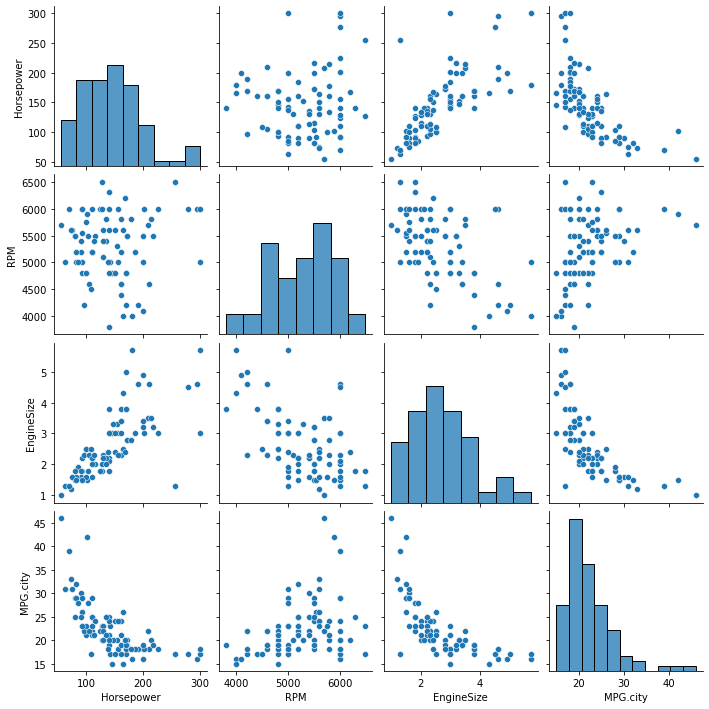

In [6]:
import seaborn as sns
sns.pairplot(cars93reduced, vars=["Horsepower","RPM","EngineSize","MPG.city"])


The following associations seem to be linear based on the scatter plot:

MPG.city and EngineSize

MPG.city and Horsepower

MPG.city and RPM

EngineSize and Horsepower

Similarly, the scatter plot matrix for associations 6 to 8 comprising variables Length, Wheelbase and Turn.cirlce shown below indicates possible linear associations between

Length and Wheelbase

Length and Turn.circle

Wheelbase and Turn.circle

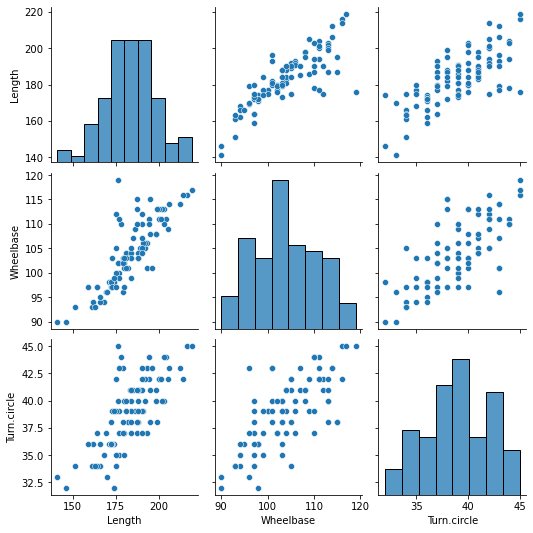

In [7]:
import seaborn as sns
sns.pairplot(cars93reduced, vars=["Length","Wheelbase","Turn.circle"])


Based on the observations from the scatter plots, the following associations are selected for further analysis:

MPG.city and EngineSize

MPG.city and Horsepower

MPG.city and RPM

EngineSize and Horsepower

Length and Wheelbase

Length and Turn.circle

Wheelbase and Turn.circle

### covariance

In [8]:
sum((cars93["MPG.city"] - cars93["MPG.city"].mean()) * (cars93["EngineSize"] - (cars93["EngineSize"].mean()))/(cars93.shape[0]-1))
#prints -4.139165497896213


-4.139165497896213

In [9]:
cars93["EngineSize"].cov(cars93["MPG.city"])
#prints -4.139165497896213


-4.139165497896213

The obtained covariance value (-4.13916) indicates that the direction of covariance is negative and its degree/magnitude is 4.13916.

In [10]:
cars93["EngineSize"].cov(cars93["MPG.city"])
#prints -4.139165497896213


-4.139165497896213

In [11]:
cars93["Horsepower"].cov(cars93["MPG.city"])
#prints -197.9798971482001


-197.9798971482001

In [12]:
cars93["RPM"].cov(cars93["MPG.city"])
#prints 1217.4789621318369


1217.4789621318369

In [13]:
cars93["EngineSize"].cov(cars93["Horsepower"])
#prints 39.776998597475455


39.776998597475455

In [14]:
cars93["Length"].cov(cars93["Wheelbase"])
#prints 82.02197288452543


82.02197288452543

In [15]:
cars93["Length"].cov(cars93["Turn.circle"])
#prints 34.780621785881266


34.780621785881266

In [16]:
cars93["Wheelbase"].cov(cars93["Turn.circle"])
#prints 15.899836372136514


15.899836372136514

Here it is observed that:

There is a negative association between:

MPG.city and EngineSize

MPG.city and Horsepower

There is a positive association between:

MPG.city and RPM

EngineSize and Horsepower

Length and Wheelbase

Length and Turn.circle

Wheelbase and Turn.circle

This indicates that MPG.city is inversely proportional to EngineSize, inversely proportional to Horsepower, and directly proportional to RPM in the given sample dataset.

Similarly, Turn.circle is directly proportional to Wheelbase and directly proportional to Length in this sample dataset.

#### covariance matrix

In [17]:
cars93[["MPG.city","EngineSize","Horsepower","RPM"]].cov()

,MPG.city,EngineSize,Horsepower,RPM
MPG.city,31.582281,-4.139165,-197.979897,1217.478962
EngineSize,-4.139165,1.076122,39.776999,-339.163745
Horsepower,-197.979897,39.776999,2743.078775,1146.633941
RPM,1217.478962,-339.163745,1146.633941,356088.709677


### Pearson correlation
Pearson correlation coefficient is used on numeric variables pulled out of a population that is normally distributed. These numeric variables have to be of the interval or ratio scale.

The Shapiro-Wilk test on Turn.circle, Length and Wheelbase in the given data set for a significance level of 0.05 is shown below.

In [18]:
from scipy.stats import shapiro
shapiro(cars93["Turn.circle"])
#prints (0.9762530326843262, 0.08784385770559311)

ShapiroResult(statistic=0.9762530326843262, pvalue=0.08784385770559311)

In [19]:
shapiro(cars93["Length"])
#prints (0.9909828305244446, 0.7838887572288513)


ShapiroResult(statistic=0.9909828305244446, pvalue=0.7838887572288513)

In [20]:
shapiro(cars93["Wheelbase"])
#prints (0.9785544276237488, 0.12946628034114838)


ShapiroResult(statistic=0.9785544276237488, pvalue=0.12946628034114838)

The first value is the test statistic and the second value is the p-value.

The p-value obtained from the Shapiro-Wilk test suggests that the underlying population could be normally distributed (p-value > chosen significance level).

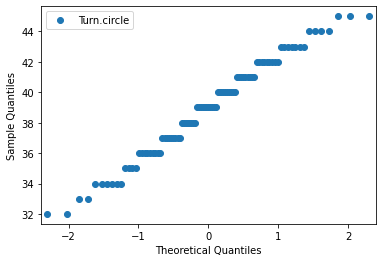

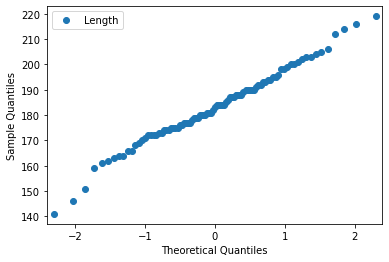

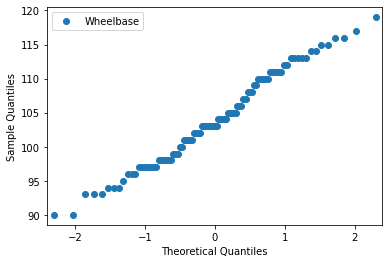

In [21]:
## QQ plot
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(cars93["Turn.circle"])
plt.legend(["Turn.circle"])
plt.show()
sm.qqplot(cars93["Length"])
plt.legend(["Length"])
plt.show()
sm.qqplot(cars93["Wheelbase"])
plt.legend(["Wheelbase"])
plt.show()


In [22]:
cars93["Length"].corr(cars93["Turn.circle"],method="pearson")
#prints 0.7389545018604418


0.7389545018604418

In [23]:
cars93["Wheelbase"].corr(cars93["Turn.circle"],method="pearson")
#prints 0.7233244020299519


0.7233244020299519

The correlation values of Length & Turn.circle and Wheelbase & Turn.circle, suggest that the association between these variables is strong (correlation is close to 1).

### Spearman correlation

The Spearman Rho correlation coefficient is a rank based coefficient, where the variables need not be normally distributed. However, it is mandatory for these variables to be either in interval, ordinal or ratio scale. In addition, it is expected that the association between the variables is monotonic.

The Shapiro-Wilk test with a significance level of 0.05 for Horsepower, RPM, EngineSize and MPG.city is as shown below.

In [24]:
shapiro(cars93["Horsepower"])
#prints (0.9358058571815491, 0.00019156414782628417)


ShapiroResult(statistic=0.9358058571815491, pvalue=0.00019156414782628417)

In [25]:
shapiro(cars93["RPM"])
#prints (0.9739203453063965, 0.059240180999040604)


ShapiroResult(statistic=0.9739203453063965, pvalue=0.059240180999040604)

In [26]:
shapiro(cars93["EngineSize"])
#prints (0.9360973238945007, 0.00019901638734154403)


ShapiroResult(statistic=0.9360973238945007, pvalue=0.00019901638734154403)

In [27]:
shapiro(cars93["MPG.city"])
#prints (0.8583050966262817, 5.762488086702433e-08)


ShapiroResult(statistic=0.8583050966262817, pvalue=5.762488086702433e-08)

The p-value here suggests that the data in the underlying population may not be normally distributed (p-value smaller than chosen significance value).

Therefore the association between these variables can be measured using Spearman correlation coefficient.

Rank is assigned by picking a random variable and comparing against other values of that variable in the dataset.

The below code illustrates the assignment of rank for the first 10 values of Horsepower using rank() method in Pandas.

In [28]:
first10hp = cars93["Horsepower"].head(10)
first10hp = first10hp.sort_values(ascending=False)
rankfirst10hp = first10hp.rank()
print(list(rankfirst10hp))          #prints [10.0, 8.5, 8.5, 7.0, 5.5, 5.5, 3.5, 3.5, 2.0, 1.0]


[10.0, 8.5, 8.5, 7.0, 5.5, 5.5, 3.5, 3.5, 2.0, 1.0]


It can be observed that the highest value gets the highest rank. Here 208 is the highest value, among 10 values, hence it is assigned the highest rank (10.0). If a value is found to be repeating, then it is assigned the average rank. Here 200 occurs at 9th and 8th position and therefore it receives the rank 8.5 which is the average of 9 and 8. Similarly, 172 and 170 receive 5.5 and 3.5 as rank respectively.

The Spearman correlation of Horsepower and MPG.city, RPM and MPG.city, and EngineSize and MPG.city are shown below

In [29]:
cars93["Horsepower"].corr(cars93["MPG.city"],method="spearman")
#prints -0.7893070882303793


-0.7893070882303793

In [30]:
cars93["RPM"].corr(cars93["MPG.city"],method="spearman")
#prints 0.38964509885135185


0.38964509885135185

In [31]:
cars93["EngineSize"].corr(cars93["MPG.city"],method="spearman")
#prints -0.8212079921743175


-0.8212079921743175

The correlation values suggest that the association between EngineSize and MPG.city is stronger than the association between Horsepower and MPG.city. Here it can be noticed that the strength of the association is attributed to the magnitude of the correlation value and not the sign.

### Kendall Tau Correlation
The Kendall Tau correlation coefficient is a rank based coefficient similar to Spearman correlation, where the variables need not be normally distributed. However, it is mandatory for these variables to be either in interval, ordinal or ratio scale. In addition, it is expected that the association between the variables is monotonic. 

Let (x1, y1), (x2, y2), …, (xn, yn) be a set of observations derived from the two joint random variables X and Y.

In a way that all the values of (xi) and (yi) are to be different.

If both the elements of a particular pair agree(both the elements of the lesser or greater compared to the other pair) then they are called concordant pairs. Similarly if the elements of the pair disagree then they are called discordant. And they are neither concordant nor discordant if both elements are equal to the other observation.

Computing the number of concordant and discordant pairs for a given data set is as illustrated below.

Ranks of three entries of RPM and MPG.city from the sample dataset is given

In [32]:
first25rpm = np.array(cars93["RPM"].head(25).rank())
first25mpg = np.array(cars93["MPG.city"].head(25).rank())
np.array([first25rpm,first25mpg])[:,19:22]
#prints array([[18. , 12.5, 8.5],[14. , 20.5, 14. ]])


array([[18. , 12.5,  8.5],
       [14. , 20.5, 14. ]])

Here, the pair of (x1=18.0, y1=14.0) and (x2=12.5, y2=20.5) is discordant because x1 > x2 and y1 < y2. The pair of (x2=12.5, y2=20.5) and (x3=8.5, y3=14.0) is concordant because x2 > x3 and y2 > y3. The pair of (x1=18.0, y1=14.0) and (x3=8.5, y3=14.0) is neither concordant nor discordant because y2 = y3.

The Kendall Tau correlation for these pairs can thus be computed as


The Kendall Tau correlation for these pairs is observed to be 0 as shown below.

In [33]:
rpm_values = pd.DataFrame({"rpm_ranks" : [18.0 , 12.5, 8.5]})
mpg_values = pd.DataFrame({"mpg_ranks" :[14.0 , 20.5, 14.0 ]})
mpg_values["mpg_ranks"].corr(rpm_values["rpm_ranks"], method = "kendall")
#prints 0.0

0.0

The Kendall Tau correlation coefficient of MPG.city and Horsepower, MPG.city and RPM, MPG.city and EngineSize are shown below.

In [34]:
cars93["Horsepower"].corr(cars93["MPG.city"],method="kendall")
#prints -0.6232924179871033


-0.6232924179871033

In [35]:
cars93["RPM"].corr(cars93["MPG.city"],method="kendall")
#prints 0.29452246826301876


0.29452246826301876

In [36]:
cars93["EngineSize"].corr(cars93["MPG.city"],method="kendall")
#prints -0.6820807909116785


-0.6820807909116785

Kendall coefficient value for a dataset is usually lower than the Spearman coefficient value for the same data set. The relationship between the Kendall Tau coefficient and Spearman Rho coefficient is given by

-1 < equal {(3 kendall tau) - (2 spearman rho)} < equal 1


### Correlation Matrix
For multivariate data, the correlation matrix captures the values of correlation between the selected parameters of the data set.

The Pearson correlation matrix of MPG.city, EngineSize, Horsepower and RPM is shown below.

In [37]:
cars93[["MPG.city","EngineSize","Horsepower","RPM"]].corr()


,MPG.city,EngineSize,Horsepower,RPM
MPG.city,1.000000,-0.710003,-0.672636,0.363045
EngineSize,-0.710003,1.000000,0.732120,-0.547898
Horsepower,-0.672636,0.732120,1.000000,0.036688
RPM,0.363045,-0.547898,0.036688,1.000000


Cautions with correlation
While computing correlation to determine the nature of association between two variables, the following cautions have to be kept in mind:

1. Correlation is not the right measure for finding association for non-linear relationships. To determine whether two variables may be linearly related, a scatter plot can be used.

2. Pearson correlation can be affected by outliers.  A box plot can be used to identify the presence of outliers. The effect of outliers is minimal for Spearman correlation therefore, if outliers cannot be manipulated or eliminated from the analysis with proper justification, Spearman correlation is preferred.

3. A correlation value close to 0 indicates that the variables are not linearly associated, however these variables may still be related. Thus it is advised to plot the data.

4. Correlation does not imply causation i.e. based on the value of correlation, it cannot be asserted that one variable causes the other.

### Chi-Squared Test
The design team at ABCarz speculate that DriveTrain may influence the Type of the car.

Since these variables are categorical, covariance and correlation may be inappropriate metrics to determine the existence of an association between them.

Two-way tables are used to examine the relationship between two categorical variables. The two-way table between DriveTrain and Type is shown below.

In [38]:
two_way_table = pd.crosstab(index=cars93["DriveTrain"], columns=cars93["Type"])
two_way_table.index = ["4WD","Front","Rear"]
two_way_table


Type,Compact,Large,Midsize,Small,Sporty,Van
4WD,1,0,0,2,2,5
Front,13,7,17,19,7,4
Rear,2,4,5,0,5,0


The existence of an association can be determined by performing a Chi-squared test on the two-way table.

Chi-squared test for independence is used to test if evidence pertaining to the relationship of variables in the sample is strong enough to generalize this relationship for the population.

For the given dataset, the existence of a relationship between DriveTrain and Type of car can be tested using the Chi-squared test as follows.

1. Define the null and the alternate hypothesis
H0 (Null hypothesis): The variables are independent.
H1 (Alternate hypothesis): The variables are dependent.

2. Select a level of significance – usually 0.05 or 0.1. For the given dataset, the level of significance is selected as 0.05.

3. Identify the degrees of freedom. This is usually computed as, (no. of rows – 1) × (no. of columns – 1).

4. For the relationship between DriveTrain and Type of car, the degrees of freedom is (3 – 1) × (6 – 1) = 10. Find the critical value for the given significance level and degrees of freedom from the table below

5. Compute the chi-squared statistic 

chi^2 = sum [(O - E)^2]/E

Where O is observed frequency and E is the expected frequency.

Using the two way table (under the null hypothesis), E is calculated as

E = (Row sum * column sum)/sample size

6.    In order to reject the null hypothesis, the computed chi-squared value should be greater than the identified critical value.

 

Chi-squared test can be performed using chi2_contingency,chi2 in scipy.stats. The chi-squared test on the given data set for the association between drive-train and type is shown below.

In [39]:
from scipy.stats import chi2_contingency,chi2
chi2.ppf(1-0.05,10)
chi2_contingency(two_way_table)


(35.00129365348582,
 0.00012480179759447616,
 10,
 array([[ 1.72043011,  1.1827957 ,  2.3655914 ,  2.25806452,  1.50537634,
          0.96774194],
        [11.52688172,  7.92473118, 15.84946237, 15.12903226, 10.08602151,
          6.48387097],
        [ 2.75268817,  1.89247312,  3.78494624,  3.61290323,  2.40860215,
          1.5483871 ]]))

* The first line indicates the chi-squared value. 

* Second line indicates the p-value.

* Third indicates the degrees of freedom

It can be observed that the computed chi-squared statistic is greater than the critical value, hence the null hypothesis is rejected.

Also, the p-value obtained is lesser than the chosen significance level. This is another indicator which helps determine whether to reject or accept the null hypothesis. If the obtained p-value is lower than the significance level, then the null hypothesis is rejected.

Chi squared test - categorical dependent, categorical independent \
Logistic regression - categorical dependent, numeric independent \
T test, Anova - numeric dependent, categorical independent\
spearman correlation, linear regression - numeric dependent,numeric independent

### Phi coefficient
The design team is interested to know if there is any association between the availability of manual transmission in the car and the origin of the car. 

The snap of the data indicating the presence of manual transmission and the origin of the car is shown below. 

In [40]:
cars93[["Man.trans.avail","Origin"]].head(10)


,Man.trans.avail,Origin
0,Yes,non-USA
1,Yes,non-USA
2,Yes,non-USA
3,Yes,non-USA
4,Yes,non-USA
5,No,USA
6,No,USA
7,No,USA
8,No,USA
9,No,USA


Here, Man.trans.avail and Origin are binary variables and the existence of the association between binary variables can be determined using the Phi coefficient.

The Phi coefficient is determined using the two-way table between the binary variables. The two binary variables are said to be positively associated if most of the data fall along the diagonal. The Phi value for a given two-way table is as expressed below.


Where, e and f are row sum, and g and h are the column sum of the given two-way table.

The two-way table between Man.trans.avail and Origin is as shown below.

We create a Sum column with the sum of values in columns using axis parameter. 

In [41]:
origin_trans = pd.crosstab(index=cars93["Man.trans.avail"],columns=cars93["Origin"])
origin_trans.index = ["No","Yes"]
origin_trans["Sum"] = origin_trans.sum(axis=1)


We create an index Sum with the sum of values in rows. Transpose and append it to our existing data frame.

In [42]:
other = origin_trans.sum(axis=0)
other = pd.DataFrame({"Sum":list(other)})
other.index=["USA","non-USA","Sum"]
transposed_other = other.T
origin_trans.append(transposed_other,sort=False)


C:\Users\Shrinath\AppData\Local\Temp\ipykernel_7104\2075693191.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin_trans.append(transposed_other,sort=False)


,USA,non-USA,Sum
No,26,6,32
Yes,22,39,61
Sum,48,45,93


The Phi coefficient is also the Pearson correlation coefficient for two binary variables. This can be determined using the corr method.

In [43]:
man_vec = cars93["Man.trans.avail"].apply(lambda x: 1 if x=="Yes" else 0)
origin_vec = cars93["Origin"].apply(lambda x: 1 if x=="USA" else 0)


In [44]:
man_vec.corr(origin_vec, method="pearson")
#prints -0.4295382099074451


-0.4295382099074451

The value of Phi also lies in the range [-1,+1] and a value closer to 1 indicates a stronger association.

The Phi coefficient is also related to the Chi-squared statistic for a 2x2 contingency table as shown below.

Phi^2 = Chi^2 / n

## Market Basket Analysis

**Description of data**

The data presented here is hypothetical and comprises some attributes as described below.

BillNumber: This is the Bill number for each customer purchase.

CustomerName: Name of the Customer.

ContactNo: Contact number of the customer.

Items: List of items purchased by the customer. This is a factor with various levels

From the given data, they wish to find the items that were purchased most frequently. They also wish to determine the item(s) which encouraged the customer to purchase additional item(s). Such analysis is commonly termed as Market Basket Analysis, where the interesting associations between various items are determined.

The transactions can be plotted on a bar plot to determine the most frequent item. The code to convert the transactions to the sparse matrix and display the bar plot is as shown below.

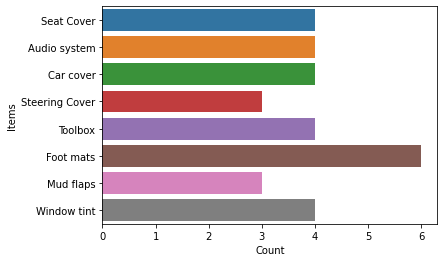

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("marketbasket-caraccessories.xlsx")
df = df.replace(float("nan"), 0)
df = df.replace("y", 1)
df = pd.DataFrame({"Items":list(df.columns),"Count":list(df.sum(axis=0))})
bar = sns.barplot(data = df,y="Items",x="Count") #plot the items x count


The team seeks to determine the purchase behavior wherein the purchase of foot mat was accompanied by the purchase of which other items. For example, the team seeks to determine the no. of transactions wherein the purchase of foot mats is accompanied by the purchase of seat cover. The team also seeks to determine the no. of transactions where the purchase of foot mats is accompanied by the purchase of mud flaps.

From the frequency table, it can be observed that seat covers and foot mats were purchased together in 3 transactions. Also, mud flaps and foot mats were purchased together in 1 transaction alone.

These associations can be represented as association rules which are specified as follows:

Foot mats → Seat cover: Customers who bought Foot mats also bought seat cover.

Foot mats → Mud flaps: Customers who bought Foot mats also bought mud flaps.

In order to determine if these association rules are interesting, measures such as support & confidence can be used.

Support and Confidence
Support and confidence indicate how interesting an association rule is. Support indicates the usefulness of the rule, while confidence indicates the certainty of the rule. For a given association rule x → y, support indicates the fraction of transactions that contain both x and y. The confidence indicates the fraction of transactions that contain both x and y among the transactions that contain x.

The support of an association rule x → y can be determined as follows.

support = (no. of transactions containing both x and y)/(Total no. of transactions)

From the above formula, it can be observed that the range of values of support is between 0 and +1.

The confidence of an association rule x → y can be determined as follows.

confidence = (no. of transactions containing both x and y)/(Total no. of transactions containing x)

From the above formula, it can be observed that the range of values of confidence is also between 0 and +1.

The support and confidence for the association between foot mats and the seat covers are as given below.

support = (no. of transactions containing both x and y)/(Total no. of transactions) = 3/15 = 0.2

A support of 0.2 here indicates that 20% of all customers purchased both foot mats and seat cover.

confidence = (no. of transactions containing both x and y)/(Total no. of transactions containing x) = 3/6 = 0.5

A confidence of 0.5 here indicates that 50% of customers who purchased foot mats also purchased seat cover.

Similarly, the support and confidence for the association between foot mats and mud flaps are 1/15 and 1/6 respectively. 

Support and confidence can also be expressed in terms of probability as shown below.

support = (no. of transactions containing both x and y)/(Total no. of transactions) = P(x U y)

confidence = (no. of transactions containing both x and y)/(Total no. of transactions containing x) = P(y | x)

An association rule can be said to be sufficiently useful by interpreting its support and confidence. Typically, the obtained value of support is compared against a chosen threshold to signify that the association rule must be observed in at least a significant number of transactions.

For example, if the chosen support threshold is 0.1 then the association rule is expected to hold true for at least 10% of the transactions. The choice of this threshold is based on domain and the total number of transactions being studied.

Typically an association rule is said to be interesting if:     

Support  ≥ min_support threshold

Confidence ≥ min_confidence threshold

The choice of min_support threshold and min_confidence threshold is purely based on domain knowledge.

If the min_support threshold and min_confidence threshold for this sample study are considered as 0.1 and 0.4 respectively, then the association between foot mats and seat cover can be said to be interesting because the support and confidence for this association are 0.2 and 0.5 respectively.


**Lift**

For an association rule represented as x → y, Lift is calculated by the ratio of the confidence of the association and the number of transactions containing the rule consequent. Where x is the antecedent and y is the consequent of the rule. This measure indicates the relationship between x and y by measuring their strength of the association which can be computed as shown below.

Lift = confidence(x,y)/ =support(y) = P(y|x)/P(y)

Larger values of lift indicate stronger association because lift indicates the strength of association. The nature of association based on the value of lift can be summarized as below:

If lift = 1, then x and y are said to be disassociated/statistically independent. The presence of x may have no influence on the presence of y.

If lift > 1, then x and y are said to be positively associated i.e. the presence of x tends to indicate the presence of y.

If lift < 1, then x and y are said to be negatively associated.

#### Apriori

When the data set has a large number of transactions with a considerably large number of items, discovering interesting associations among items will be time-consuming. The technique illustrated earlier may not facilitate the purpose of determining interesting associations in an efficient manner. In order to analyze interesting associations among a larger number of items for a substantially higher number of transactions, sophisticated techniques are adopted. One such technique is the Apriori technique.

Consider that the Apriori algorithm resulted {I1, I2, I3} and {I1, I2, I5} as the frequent item sets. Valid association rules can be generated based on the obtained frequent item sets as follows:

1. List out all non-empty subset for each of the obtained frequent item sets. Here for the frequent item set {I1, I2, I3}, the non-empty proper subsets are {I1, I2}, {I1, I3}, {I2, I3}, {I1}, {I2}, {I3}.

2. Frame the association rules using the subsets identified. The association rule as {elements of a subset} → {elements in frequent item set that is/are not in the chosen subset}. For example, if {I1, I2} is chosen as the subset from the {I1, I2, I3} frequent item set, then the association rule is {I1, I2} → {I3}

3. Compute the confidence for each of the association rules framed in the previous step.

4. Select the association rules whose computed confidence is greater than or equal to the min_confidence threshold.

The mlxtend module in Python provides the apriori() method which determines the association rules for a given data set based on the values of min_support and min_confidence.

The following code illustrates the usage of the apriori() method of mlxtend to mine association rules.

In [57]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
file = open("Groceries.csv",'r')
strings = []
for i in file.readlines():
    strings.append(i.strip().split("\n")) #get strings as a list of strings #print(strings)
dataset = []
for i in strings:
    dataset.append(i[0].split(",")) # split strings to the list of strings. 
print(dataset)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.07, use_colnames=True)
print(frequent_itemsets)


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

In [58]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).head() #confidence metric


NameError: name 'association_rules' is not defined